In [1]:
import math
import sys
sys.path.append("..")

from keras.layers import Convolution2D, MaxPooling2D, Activation
from keras.models import Model
from keras import backend as K
from keras.preprocessing.image import load_img, img_to_array
from keras.utils.vis_utils import plot_model
from keras.applications import inception_v3
from keras.applications import vgg16
from keras.applications import vgg19
from keras.applications.imagenet_utils import preprocess_input

import numpy as np
import matplotlib.pyplot as plt
import cv2  # only used for loading the image, you can use anything that returns the image as a np.ndarray

import keras_alexnet
import keras_visualize_utils as kvu

%matplotlib inline

Using Theano backend.
WARNING (theano.sandbox.cuda): The cuda backend is deprecated and will be removed in the next release (v0.10).  Please switch to the gpuarray backend. You can get more information about how to switch at this URL:
 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29

Using gpu device 0: GeForce GTX 1060 6GB (CNMeM is disabled, cuDNN 5110)


## Lets see the image!

(32L, 32L, 3L) 32 32 3


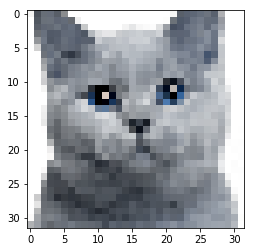

In [2]:
ori_img = cv2.imread(r'C:\DL\image\cat_blue_32.png')
plt.imshow(ori_img)
# what does the image look like?
print ori_img.shape, ori_img.shape[0], ori_img.shape[1], ori_img.shape[2]

In [3]:
img = np.expand_dims(ori_img, axis=-1)
print img.shape, img.shape[0], img.shape[1], img.shape[2]

(32L, 32L, 3L, 1L) 32 32 3


## Load the existed models

In [4]:
model = keras_alexnet.AlexNet(include_top=True, model_folder=r'..\model')
# plot_model(model, to_file='model.png', show_shapes=True)
print model.summary()

>> AlexNet Model. Input shape = (3, 32, 32)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 96, 32, 32)        34944     
_________________________________________________________________
activation_1 (Activation)    (None, 96, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 96, 16, 16)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 96, 16, 16)        384       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 256, 16, 16)       614656    
_________________________________________________________________
activation_2 (Activation)    (None, 256, 16, 16)       0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (No

In [5]:
# Get the symbolic outputs of each "key" layer (we gave them unique names).
model_input = model.input
layer_dict = dict([(layer.name, layer) for layer in model.layers])
layer_name = "conv2d_1"
assert layer_name in layer_dict.keys(), 'Layer ' + layer_name + ' not found in model.'
layer_output = layer_dict[layer_name].output
layer_weights = layer_dict[layer_name].get_weights()
print "layer_output", layer_output
print "layer_weights", layer_weights[0].shape, layer_weights[1].shape, layer_weights[0].shape[3]

layer_output Elemwise{add,no_inplace}.0
layer_weights (11L, 11L, 3L, 96L) (96L,) 96


In [6]:
input_batch = kvu.pre_process_one_batch(img)

adjust_shape_to_model -> channels_first (3L, 32L, 32L)
input_batch.shape (1L, 3L, 32L, 32L)


## Make the prediction for final output

In [7]:
output_category = model.predict(input_batch)
print "output_category.shape", output_category.shape
print output_category.argmax(), output_category.argmax(axis=-1)

output_category.shape (1L, 10L)
3 [3]


## Make the prediction for layer output

In [8]:
intermediate_layer_model = Model(inputs=model.input, outputs=layer_output)
output_batch = intermediate_layer_model.predict(input_batch)
print "output_batch.shape", output_batch.shape

output_batch.shape (1L, 96L, 32L, 32L)


In [9]:
get_layer_output = K.function([model_input], [layer_output])
output_batch = get_layer_output([input_batch])[0]
print "output_batch.shape", output_batch.shape

output_batch.shape (1L, 96L, 32L, 32L)


In [10]:
img_features = kvu.post_process_one_batch(output_batch, img)

output_batch.shape (1L, 96L, 32L, 32L)
adjust_shape_to_show -> channels_first (32L, 32L, 96L)
img.shape (32L, 32L, 96L)


Visualize weights. Layers Features 96, Dim 3, Size 11*11
Layer Weights: 0 (11L, 11L, 3L)
Visualize image. Feature maps 3, Size 11*11
Visualize image in flat mdoe. Flat : 3
img_data.shape (11L, 11L, 3L) 3


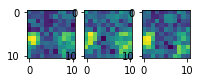

Layer Weights: 1 (11L, 11L, 3L)
Visualize image. Feature maps 3, Size 11*11
Visualize image in flat mdoe. Flat : 3
img_data.shape (11L, 11L, 3L) 3


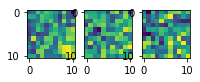

Layer Weights: 2 (11L, 11L, 3L)
Visualize image. Feature maps 3, Size 11*11
Visualize image in flat mdoe. Flat : 3
img_data.shape (11L, 11L, 3L) 3


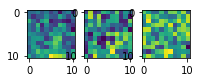

Layer Weights: 3 (11L, 11L, 3L)
Visualize image. Feature maps 3, Size 11*11
Visualize image in flat mdoe. Flat : 3
img_data.shape (11L, 11L, 3L) 3


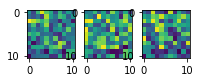

Layer Weights: 4 (11L, 11L, 3L)
Visualize image. Feature maps 3, Size 11*11
Visualize image in flat mdoe. Flat : 3
img_data.shape (11L, 11L, 3L) 3


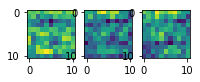

Layer Weights: 5 (11L, 11L, 3L)
Visualize image. Feature maps 3, Size 11*11
Visualize image in flat mdoe. Flat : 3
img_data.shape (11L, 11L, 3L) 3


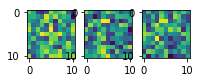

Layer Weights: 6 (11L, 11L, 3L)
Visualize image. Feature maps 3, Size 11*11
Visualize image in flat mdoe. Flat : 3
img_data.shape (11L, 11L, 3L) 3


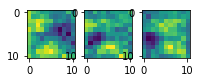

Layer Weights: 7 (11L, 11L, 3L)
Visualize image. Feature maps 3, Size 11*11
Visualize image in flat mdoe. Flat : 3
img_data.shape (11L, 11L, 3L) 3


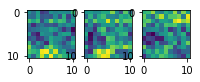

Layer Weights: 8 (11L, 11L, 3L)
Visualize image. Feature maps 3, Size 11*11
Visualize image in flat mdoe. Flat : 3
img_data.shape (11L, 11L, 3L) 3


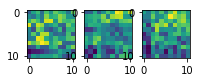

Layer Weights: 9 (11L, 11L, 3L)
Visualize image. Feature maps 3, Size 11*11
Visualize image in flat mdoe. Flat : 3
img_data.shape (11L, 11L, 3L) 3


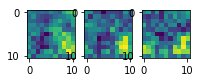

Layer Weights: 10 (11L, 11L, 3L)
Visualize image. Feature maps 3, Size 11*11
Visualize image in flat mdoe. Flat : 3
img_data.shape (11L, 11L, 3L) 3


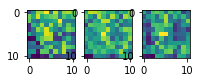

Layer Weights: 11 (11L, 11L, 3L)
Visualize image. Feature maps 3, Size 11*11
Visualize image in flat mdoe. Flat : 3
img_data.shape (11L, 11L, 3L) 3


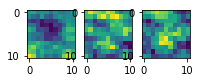

Layer Weights: 12 (11L, 11L, 3L)
Visualize image. Feature maps 3, Size 11*11
Visualize image in flat mdoe. Flat : 3
img_data.shape (11L, 11L, 3L) 3


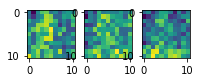

Layer Weights: 13 (11L, 11L, 3L)
Visualize image. Feature maps 3, Size 11*11
Visualize image in flat mdoe. Flat : 3
img_data.shape (11L, 11L, 3L) 3


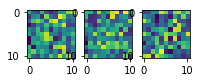

Layer Weights: 14 (11L, 11L, 3L)
Visualize image. Feature maps 3, Size 11*11
Visualize image in flat mdoe. Flat : 3
img_data.shape (11L, 11L, 3L) 3


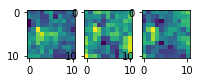

Layer Weights: 15 (11L, 11L, 3L)
Visualize image. Feature maps 3, Size 11*11
Visualize image in flat mdoe. Flat : 3
img_data.shape (11L, 11L, 3L) 3


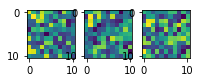

In [11]:
kvu.visualize_layer_weights(layer_weights, bFlat=True)

Visualize image. Feature maps 96, Size 32*32
Visualize image in overlay mdoe. Overlay : 96
img_data.shape (32L, 32L, 96L) 3


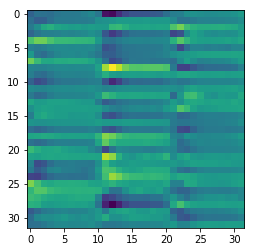

In [12]:
kvu.visualize_img(img_features)

Visualize image in flat mdoe. Flat : 96
img_data.shape (32L, 32L, 96L) 3


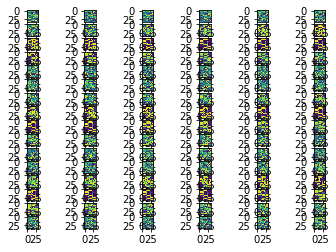

In [13]:
kvu.visualize_in_flat(img_features)